# 📊 Google Trends Analysis: "Cloud Computing"

This notebook explores the popularity of the search term **"Cloud Computing"** using the Google Trends API via the `pytrends` Python library.

We’ll analyze:
- Interest over time (globally and by date range)
- Interest by geographic region
- Related search queries
- Google’s autocomplete keyword suggestions

## 🔧 Step 1: Import Required Libraries

We begin by importing the necessary Python libraries:

- `pandas`: for data manipulation and analysis
- `pytrends`: unofficial Google Trends API for Python
- `matplotlib.pyplot`: for plotting visualizations
- `time`: to manage API request intervals (avoid rate-limiting)

In [2]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import time

## 🚀 Step 2: Initialize PyTrends Client

We initialize the PyTrends client using:

- `hl='en-US'`: sets language to US English
- `tz=360`: sets timezone offset in minutes (UTC+6 here; adjust as needed)

This allows us to start building search queries.

In [3]:
pytrends = TrendReq(hl='en-US', tz=360)

## 📈 Step 3: Interest Over Time (Last 12 Months)

Here, we fetch the global search interest for **"Cloud Computing"** over the past 12 months.

- A short pause is added to avoid hitting rate limits.
- The returned data includes a `"Cloud Computing"` column (interest scores) and an `"isPartial"` column, which may contain missing values.
- To avoid Pandas `FutureWarning` regarding silent downcasting, we explicitly fill and cast `"isPartial"` to `bool`.

We then display the top 10 days with the highest interest.

In [4]:
# Set keyword and time range
kw_list = ["Cloud Computing"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m')

# Pause to avoid throttling
time.sleep(2)

# Fetch interest over time data
data_12m = pytrends.interest_over_time()

# Optional: drop or convert 'isPartial' column if it exists
if 'isPartial' in data_12m.columns:
    data_12m['isPartial'] = data_12m['isPartial'].fillna(False).astype(bool)

# Sort and get top 10 peaks
data_12m_sorted = data_12m.sort_values(by="Cloud Computing", ascending=False).head(10)
data_12m_sorted

/Users/christina/miniconda3/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


,Cloud Computing,isPartial
date,,
2025-06-15,100,False
2024-12-01,96,False
2024-11-17,95,False
2025-06-22,93,False
2025-06-08,93,False
2025-05-04,92,False
2025-04-20,92,False
2025-01-19,91,False
2025-07-20,91,True


## ⏳ Step 4: Interest Over Time (January 2024)

Next, we zoom in on **January 2024** to explore short-term trends.

- This allows us to observe spikes or changes during a specific period.
- Again, we display the top 10 days with the highest interest.

In [5]:
# Focus on a specific month
pytrends.build_payload(kw_list, cat=0, timeframe='2024-01-01 2024-02-01')

# Fetch and sort
data_jan = pytrends.interest_over_time()
data_jan_sorted = data_jan.sort_values(by="Cloud Computing", ascending=False).head(10)
data_jan_sorted

,Cloud Computing,isPartial
date,,
2024-01-29,100,False
2024-01-03,95,False
2024-01-10,87,False
2024-01-30,85,False
2024-01-23,82,False
2024-01-27,81,False
2024-01-09,80,False
2024-01-24,78,False
2024-01-08,78,False


## 🌍 Step 5: Interest by Region

This section shows which **geographic regions** have the highest interest in "Cloud Computing".

- Data is grouped by region (country or state).
- We visualize the top 10 regions using a bar chart.
- Useful for identifying where demand or curiosity is strongest globally.

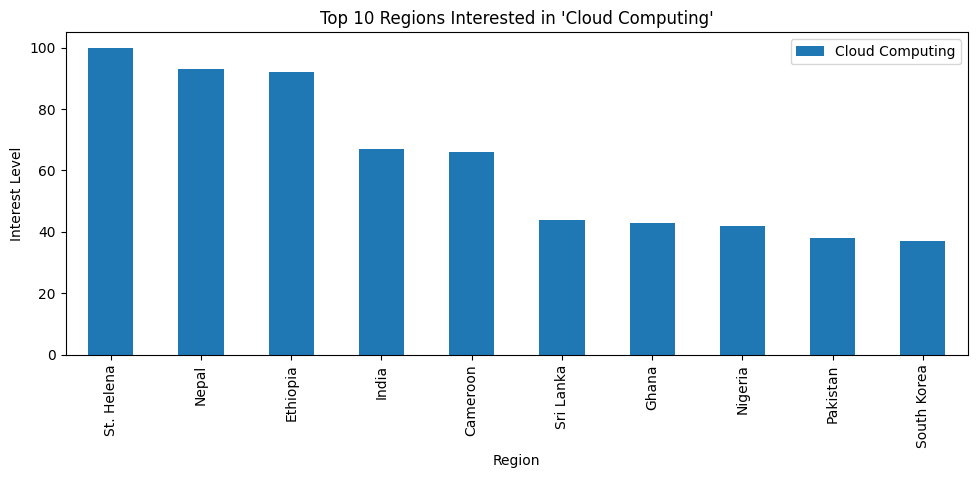

In [6]:
# Get interest by region
region_data = pytrends.interest_by_region()
top_regions = region_data.sort_values(by="Cloud Computing", ascending=False).head(10)

# Plotting
top_regions.reset_index().plot(x='geoName', y='Cloud Computing', figsize=(10, 5), kind="bar")
plt.title("Top 10 Regions Interested in 'Cloud Computing'")
plt.ylabel("Interest Level")
plt.xlabel("Region")
plt.style.use('fivethirtyeight')
plt.tight_layout()

# Save the plot as an image
plt.savefig('images/interest_by_region.png')

plt.show()

## 🔎 Step 6: Related Search Queries

We fetch related queries that users also searched for along with "Cloud Computing".

- These can reveal common **user questions**, **associated technologies**, or **emerging topics**.
- Helps us understand the context of user searches.
- If no data is returned, a message is printed instead.

In [9]:
try:
    pytrends.build_payload(kw_list=['Cloud Computing'])
    related_queries = pytrends.related_queries()
    related_queries['Cloud Computing']['top']
except (KeyError, IndexError):
    print("No related queries found for 'Cloud Computing'")

No related queries found for 'Cloud Computing'


## 💡 Step 7: Keyword Suggestions (Autocomplete)

Google's suggestion API provides **autocomplete keyword ideas** for "Cloud Computing".

- Useful for expanding your keyword list.
- Helpful in SEO, market research, and content creation.
- We display the list in a structured table after dropping the unused `mid` column.

In [10]:
# Get keyword suggestions
suggestions = pytrends.suggestions(keyword='Cloud Computing')

# Convert to DataFrame and drop 'mid' column if it exists
suggestions_df = pd.DataFrame(suggestions)
if 'mid' in suggestions_df.columns:
    suggestions_df = suggestions_df.drop(columns='mid')
suggestions_df

,title,type
0,Cloud computing,Topic
1,Cloud computing,Topic
2,Cloud computing security,Topic
3,Alibaba Cloud,Computer application company
4,Private cloud computing infrastructure,Topic
